In [1]:
import pandas as pd
import numpy as np

# nltk
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# spacy
import spacy 
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob

# gensim
import gensim
from gensim import corpora, models, similarities, matutils

# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# performance metrics
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler, MinMaxScaler
import string

# regex
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
py.init_notebook_mode(connected=True)
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

/Users/yagmurbali/opt/anaconda3/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [2]:
womensclothing = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv')

In [3]:
womensclothing.shape

(23486, 11)

In [4]:
womensclothing.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
womensclothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
womensclothing.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
womensclothing.Rating.value_counts(normalize=True)

2020-06-11 15:01:27,382 : INFO : NumExpr defaulting to 4 threads.


5    0.559099
4    0.216171
3    0.122243
2    0.066635
1    0.035851
Name: Rating, dtype: float64

In [8]:
df = womensclothing.copy()

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


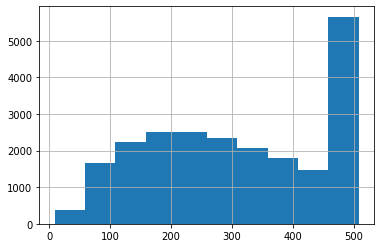

In [10]:
# shows that reviews is between 55 - 500 characters
df['Review Text'].str.len().hist()

In [11]:
# Remove 3 star reviews
df = df[df.Rating!=3]

In [12]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3403
Review Text                 797
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

# Preprocessing

In [13]:
# ratinge bakarak review test null olanları rating >= 4 ise like it, değilse dont like it şeklinde doldurdum
data2 = [df]
for dataset in data2:
    dataset['Rating'] = dataset['Rating'].astype(int)
    dataset.loc[(dataset['Rating'] <= 2) & (dataset['Review Text'].isnull() == True), 'Review Text'] = "Don't like it"
    dataset.loc[(dataset['Rating'] >= 4) & (dataset['Review Text'].isnull() == True), 'Review Text'] = "Like it"

In [14]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses


In [15]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3403
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [16]:
# rating 5 olmasına rağmen önerilmemiş
df.loc[(df.Rating==5) & (df['Recommended IND']==0)]['Review Text'].iloc[6]

"This an absolutely beautiful quality stylish coat but through no fault of the coat, i had to return it because i looked like a bear in it. i'm too short and too round around the middle for this type check and this type material. i wouldn't want to discourage anyone from trying it."

In [17]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

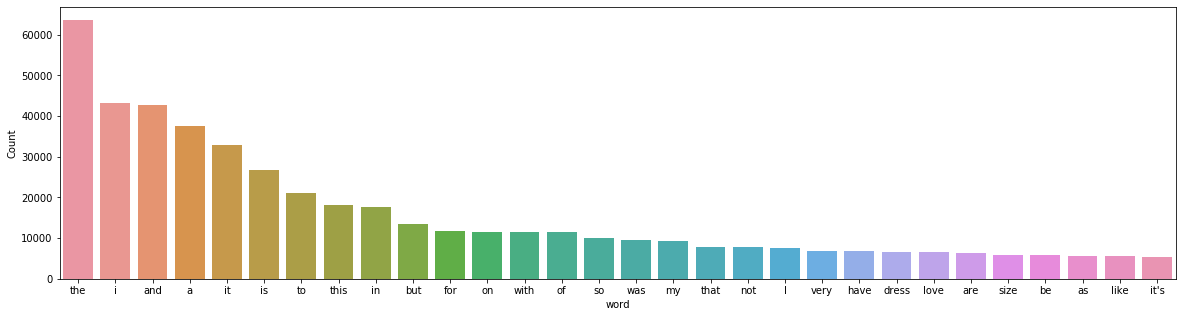

In [18]:
freq_words(df['Review Text'])

In [19]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

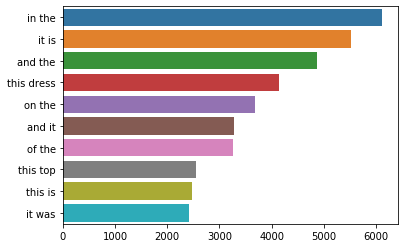

In [20]:
top_n_bigrams=get_top_ngram(df['Review Text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

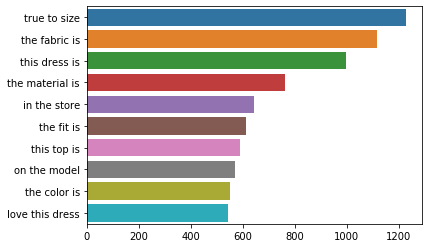

In [21]:
top_tri_grams=get_top_ngram(df['Review Text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [22]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yagmurbali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yagmurbali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def punctuation_removal(text):
    clean_list = [p for p in text if p not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df['Review_Text'] = df['Review Text'].apply(punctuation_removal)

In [25]:
#Removing stop words.
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    # converting all to lowercase
    text = text.lower()
     
    # tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(text)
    
    # delete stopwords
    words = [w for w in words if not w in stop_words]
    
    # lemmatizing
    # https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)
  
df['Review_Text'] = df['Review Text'].apply(remove_stopwords)

In [26]:
df['Review Text'].iloc[2]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [27]:
df['Review_Text'].iloc[2]

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment'

In [28]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review_Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happen find store glad ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flat due adjustable front tie perfect le...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...


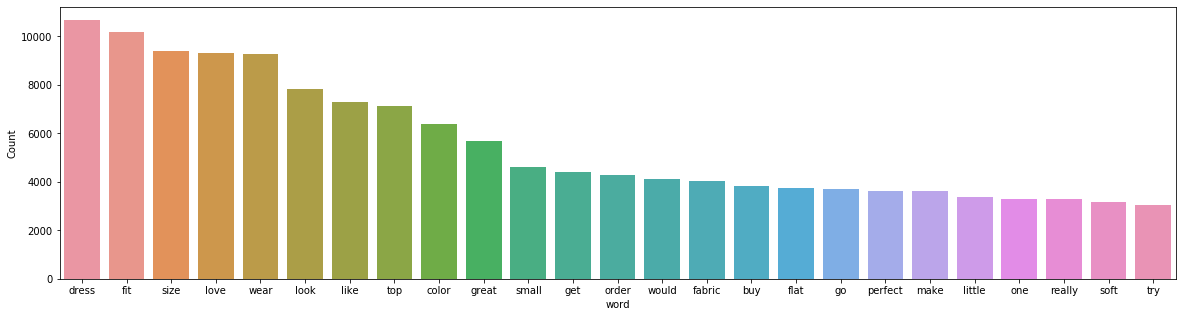

In [31]:
freq_words(df['Review_Text'], 25)

In [32]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review_Text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happen find store glad ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flat due adjustable front tie perfect le...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,love tracy reese dress one petite foot tall us...


# Topic Modelling - LDA

In [33]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

count_vectorizer.fit(df.Review_Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")

tfidf_vectorizer.fit(df.Review_Text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='\\b[a-z][a-z]+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

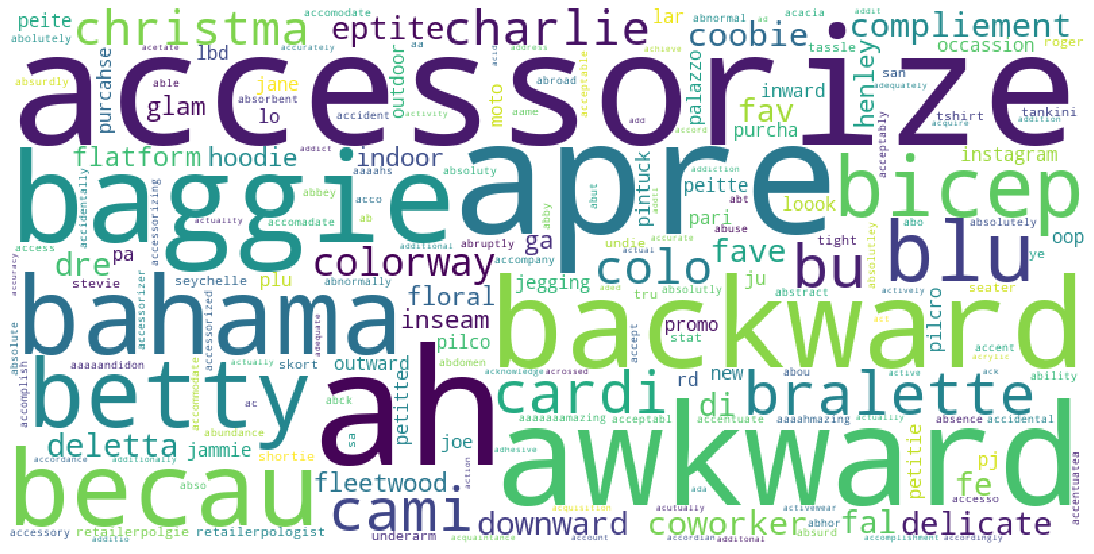

In [35]:
for_wordcloud = count_vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='white',
                      min_font_size = 5).generate(for_wordcloud_str)

plt.figure(figsize=(15, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

In [36]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(df.Review_Text).transpose()

In [37]:
doc_word_tfidf = tfidf_vectorizer.transform(df.Review_Text).transpose()

In [38]:
pd.DataFrame(doc_word.toarray(), count_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,...,20605,20606,20607,20608,20609,20610,20611,20612,20613,20614
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaamazing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaandidon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaahmazing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaahs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
pd.DataFrame(doc_word_tfidf.toarray(), tfidf_vectorizer.get_feature_names()).head()

,0,1,2,3,4,5,6,7,8,9,...,20605,20606,20607,20608,20609,20610,20611,20612,20613,20614
aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa athletic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa expect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa fit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aa generally,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
doc_tfidf = doc_word.toarray()
doc_tfidf = pd.DataFrame(doc_tfidf)
doc_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,20605,20606,20607,20608,20609,20610,20611,20612,20613,20614
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
doc_word.shape

(9246, 20615)

In [42]:
doc_word_tfidf.shape

(180145, 20615)

In [43]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word)

In [44]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [45]:
len(id2word)

9246

In [46]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=5)

2020-06-11 15:03:14,061 : INFO : using symmetric alpha at 0.3333333333333333
2020-06-11 15:03:14,063 : INFO : using symmetric eta at 0.3333333333333333
2020-06-11 15:03:14,067 : INFO : using serial LDA version on this node
2020-06-11 15:03:14,074 : INFO : running online (multi-pass) LDA training, 3 topics, 5 passes over the supplied corpus of 20615 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2020-06-11 15:03:14,090 : INFO : PROGRESS: pass 0, at document #2000/20615
2020-06-11 15:03:15,632 : INFO : merging changes from 2000 documents into a model of 20615 documents
2020-06-11 15:03:15,637 : INFO : topic #0 (0.333): 0.027*"dress" + 0.020*"fit" + 0.016*"wear" + 0.014*"color" + 0.014*"love" + 0.013*"size" + 0.013*"like" + 0.012*"look" + 0.011*"small" + 0.011*"order"
2020-06-11 15:03:15,637 : INFO : topic #1 (0.333): 0.023*"size" + 0.023*"wear" + 0.021*"love" + 0.019*"color" + 0.017*

2020-06-11 15:03:26,637 : INFO : PROGRESS: pass 0, at document #20000/20615
2020-06-11 15:03:27,656 : INFO : merging changes from 2000 documents into a model of 20615 documents
2020-06-11 15:03:27,658 : INFO : topic #0 (0.333): 0.047*"dress" + 0.025*"wear" + 0.022*"love" + 0.016*"fit" + 0.014*"color" + 0.013*"flat" + 0.012*"great" + 0.011*"buy" + 0.011*"perfect" + 0.010*"comfortable"
2020-06-11 15:03:27,659 : INFO : topic #1 (0.333): 0.025*"size" + 0.024*"love" + 0.024*"wear" + 0.021*"like" + 0.020*"fit" + 0.020*"color" + 0.018*"great" + 0.016*"small" + 0.015*"look" + 0.012*"order"
2020-06-11 15:03:27,660 : INFO : topic #2 (0.333): 0.026*"fit" + 0.024*"size" + 0.023*"look" + 0.021*"dress" + 0.016*"like" + 0.014*"fabric" + 0.012*"love" + 0.011*"make" + 0.011*"waist" + 0.010*"order"
2020-06-11 15:03:27,661 : INFO : topic diff=0.359260, rho=0.316228
2020-06-11 15:03:28,126 : INFO : -6.542 per-word bound, 93.2 perplexity estimate based on a held-out corpus of 615 documents with 15072 words

2020-06-11 15:03:36,960 : INFO : topic #1 (0.333): 0.025*"love" + 0.024*"size" + 0.024*"wear" + 0.022*"color" + 0.022*"fit" + 0.021*"like" + 0.019*"great" + 0.016*"look" + 0.015*"small" + 0.014*"sweater"
2020-06-11 15:03:36,962 : INFO : topic #2 (0.333): 0.026*"size" + 0.026*"fit" + 0.022*"look" + 0.021*"dress" + 0.017*"like" + 0.013*"fabric" + 0.012*"waist" + 0.011*"make" + 0.011*"order" + 0.010*"love"
2020-06-11 15:03:36,963 : INFO : topic diff=0.312114, rho=0.285046
2020-06-11 15:03:36,984 : INFO : PROGRESS: pass 1, at document #18000/20615
2020-06-11 15:03:37,901 : INFO : merging changes from 2000 documents into a model of 20615 documents
2020-06-11 15:03:37,903 : INFO : topic #0 (0.333): 0.051*"dress" + 0.029*"wear" + 0.025*"love" + 0.014*"fit" + 0.014*"color" + 0.013*"flat" + 0.013*"great" + 0.012*"perfect" + 0.011*"buy" + 0.011*"comfortable"
2020-06-11 15:03:37,904 : INFO : topic #1 (0.333): 0.025*"love" + 0.024*"size" + 0.024*"wear" + 0.022*"color" + 0.021*"fit" + 0.021*"like" 

2020-06-11 15:03:46,302 : INFO : topic #2 (0.333): 0.027*"size" + 0.026*"fit" + 0.022*"dress" + 0.021*"look" + 0.018*"like" + 0.013*"fabric" + 0.012*"order" + 0.012*"small" + 0.011*"waist" + 0.010*"make"
2020-06-11 15:03:46,303 : INFO : topic diff=0.286336, rho=0.274127
2020-06-11 15:03:46,325 : INFO : PROGRESS: pass 2, at document #14000/20615
2020-06-11 15:03:47,179 : INFO : merging changes from 2000 documents into a model of 20615 documents
2020-06-11 15:03:47,181 : INFO : topic #0 (0.333): 0.056*"dress" + 0.032*"wear" + 0.026*"love" + 0.014*"fit" + 0.014*"great" + 0.013*"color" + 0.013*"flat" + 0.012*"perfect" + 0.012*"buy" + 0.011*"comfortable"
2020-06-11 15:03:47,183 : INFO : topic #1 (0.333): 0.026*"love" + 0.024*"wear" + 0.023*"fit" + 0.023*"size" + 0.022*"color" + 0.021*"like" + 0.020*"great" + 0.016*"look" + 0.015*"jean" + 0.014*"sweater"
2020-06-11 15:03:47,185 : INFO : topic #2 (0.333): 0.028*"size" + 0.026*"fit" + 0.021*"dress" + 0.021*"look" + 0.018*"like" + 0.013*"fabric

2020-06-11 15:03:55,134 : INFO : topic diff=0.266404, rho=0.264374
2020-06-11 15:03:55,156 : INFO : PROGRESS: pass 3, at document #10000/20615
2020-06-11 15:03:55,961 : INFO : merging changes from 2000 documents into a model of 20615 documents
2020-06-11 15:03:55,963 : INFO : topic #0 (0.333): 0.057*"dress" + 0.033*"wear" + 0.026*"love" + 0.014*"great" + 0.014*"fit" + 0.013*"color" + 0.013*"perfect" + 0.012*"flat" + 0.011*"buy" + 0.011*"comfortable"
2020-06-11 15:03:55,964 : INFO : topic #1 (0.333): 0.026*"love" + 0.024*"wear" + 0.023*"color" + 0.023*"fit" + 0.021*"size" + 0.021*"like" + 0.020*"great" + 0.017*"look" + 0.015*"shirt" + 0.015*"jean"
2020-06-11 15:03:55,965 : INFO : topic #2 (0.333): 0.029*"size" + 0.026*"fit" + 0.021*"dress" + 0.020*"look" + 0.018*"like" + 0.015*"small" + 0.013*"order" + 0.013*"fabric" + 0.011*"petite" + 0.011*"waist"
2020-06-11 15:03:55,967 : INFO : topic diff=0.275126, rho=0.264374
2020-06-11 15:03:55,989 : INFO : PROGRESS: pass 3, at document #12000/20

2020-06-11 15:04:04,506 : INFO : topic #0 (0.333): 0.055*"dress" + 0.034*"wear" + 0.027*"love" + 0.014*"great" + 0.013*"perfect" + 0.013*"fit" + 0.013*"color" + 0.012*"flat" + 0.012*"comfortable" + 0.012*"buy"
2020-06-11 15:04:04,507 : INFO : topic #1 (0.333): 0.027*"love" + 0.024*"color" + 0.024*"wear" + 0.022*"fit" + 0.021*"like" + 0.021*"size" + 0.020*"great" + 0.017*"look" + 0.015*"shirt" + 0.015*"jean"
2020-06-11 15:04:04,508 : INFO : topic #2 (0.333): 0.031*"size" + 0.026*"fit" + 0.021*"dress" + 0.020*"look" + 0.018*"like" + 0.016*"small" + 0.014*"order" + 0.013*"fabric" + 0.011*"petite" + 0.011*"waist"
2020-06-11 15:04:04,509 : INFO : topic diff=0.265197, rho=0.255592
2020-06-11 15:04:04,532 : INFO : PROGRESS: pass 4, at document #8000/20615
2020-06-11 15:04:05,333 : INFO : merging changes from 2000 documents into a model of 20615 documents
2020-06-11 15:04:05,336 : INFO : topic #0 (0.333): 0.057*"dress" + 0.033*"wear" + 0.026*"love" + 0.014*"great" + 0.013*"perfect" + 0.013*"fi

In [47]:
lda.print_topics()

2020-06-11 15:04:15,417 : INFO : topic #0 (0.333): 0.057*"dress" + 0.034*"wear" + 0.027*"love" + 0.013*"great" + 0.013*"perfect" + 0.012*"fit" + 0.012*"flat" + 0.012*"buy" + 0.012*"color" + 0.011*"comfortable"
2020-06-11 15:04:15,420 : INFO : topic #1 (0.333): 0.028*"love" + 0.025*"color" + 0.023*"wear" + 0.022*"fit" + 0.021*"like" + 0.020*"great" + 0.020*"size" + 0.017*"look" + 0.016*"sweater" + 0.015*"jean"
2020-06-11 15:04:15,422 : INFO : topic #2 (0.333): 0.032*"size" + 0.025*"fit" + 0.021*"dress" + 0.019*"look" + 0.018*"like" + 0.017*"small" + 0.014*"order" + 0.012*"fabric" + 0.011*"petite" + 0.011*"waist"


[(0,
  '0.057*"dress" + 0.034*"wear" + 0.027*"love" + 0.013*"great" + 0.013*"perfect" + 0.012*"fit" + 0.012*"flat" + 0.012*"buy" + 0.012*"color" + 0.011*"comfortable"'),
 (1,
  '0.028*"love" + 0.025*"color" + 0.023*"wear" + 0.022*"fit" + 0.021*"like" + 0.020*"great" + 0.020*"size" + 0.017*"look" + 0.016*"sweater" + 0.015*"jean"'),
 (2,
  '0.032*"size" + 0.025*"fit" + 0.021*"dress" + 0.019*"look" + 0.018*"like" + 0.017*"small" + 0.014*"order" + 0.012*"fabric" + 0.011*"petite" + 0.011*"waist"')]

In [48]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [49]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [50]:
# Check out the document vectors in the topic space for the first 5 documents
lda_docs[0:5]

[[(0, 0.8837219), (1, 0.05787428), (2, 0.0584038)],
 [(0, 0.25345764), (1, 0.015883965), (2, 0.7306584)],
 [(0, 0.94044113), (1, 0.030866083), (2, 0.028692776)],
 [(0, 0.18589187), (1, 0.78595924), (2, 0.02814886)],
 [(0, 0.19892856), (1, 0.010510647), (2, 0.7905608)]]

In [51]:
df.Review_Text[1]

'love dress sooo pretty happen find store glad bc never would order online bc petite buy petite love length hit little knee would definitely true midi someone truly petite'

In [52]:
corpus=[]
new= df['Review_Text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1

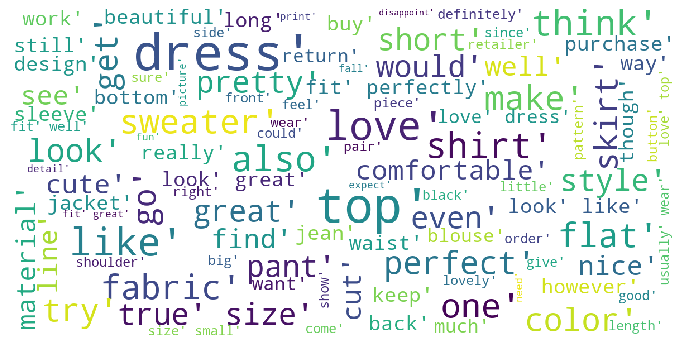

In [53]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

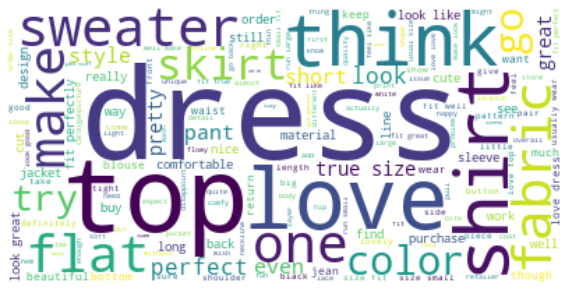

In [54]:
# Start with one review:
text = df['Review_Text']

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(" ".join(text))

# Display the generated image:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

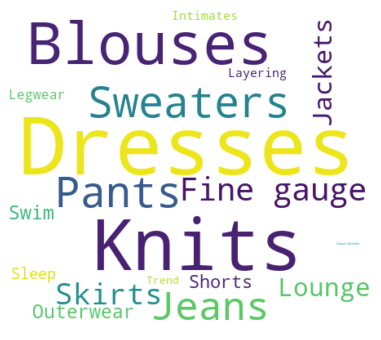

In [55]:
cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)


plt.figure(figsize = (10,6))
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [56]:
df = df[['Rating', 'Review_Text', 'Recommended IND']]

def detect_polarity(Review_Text):
    return TextBlob(Review_Text).sentiment.polarity

df['Polarity'] = df.Review_Text.apply(detect_polarity)
df.head()

,Rating,Review_Text,Recommended IND,Polarity
0,4,absolutely wonderful silky sexy comfortable,1,0.633333
1,5,love dress sooo pretty happen find store glad ...,1,0.318750
3,5,love love love jumpsuit fun flirty fabulous ev...,1,0.500000
4,5,shirt flat due adjustable front tie perfect le...,1,0.337500
5,2,love tracy reese dress one petite foot tall us...,0,0.088889


In [57]:
def detect_polarity(Review_Text):
    return TextBlob(Review_Text).sentiment.subjectivity

df['Subjectivity'] = df.Review_Text.apply(detect_polarity)
df.head()

,Rating,Review_Text,Recommended IND,Polarity,Subjectivity
0,4,absolutely wonderful silky sexy comfortable,1,0.633333,0.933333
1,5,love dress sooo pretty happen find store glad ...,1,0.318750,0.725000
3,5,love love love jumpsuit fun flirty fabulous ev...,1,0.500000,0.625000
4,5,shirt flat due adjustable front tie perfect le...,1,0.337500,0.525000
5,2,love tracy reese dress one petite foot tall us...,0,0.088889,0.483333


In [58]:
data = [df]
for dataset in data:
    dataset.loc[ dataset['Polarity'] > 0, 'Sentiment'] = 'positive'
    dataset.loc[ dataset['Polarity'] < 0, 'Sentiment'] = 'negative'
    #dataset.loc[ dataset['Polarity'] == 0, 'Sentiment'] = 'neutral'

In [59]:
data = [df]
for dataset in data:
    dataset.loc[ dataset['Subjectivity'] > 0.80 , 'Subj'] = 'very subjective'
    dataset.loc[ dataset['Subjectivity'] < 0.80, 'Subj'] = 'less subjective'

In [60]:
df.head()

,Rating,Review_Text,Recommended IND,Polarity,Subjectivity,Sentiment,Subj
0,4,absolutely wonderful silky sexy comfortable,1,0.633333,0.933333,positive,very subjective
1,5,love dress sooo pretty happen find store glad ...,1,0.318750,0.725000,positive,less subjective
3,5,love love love jumpsuit fun flirty fabulous ev...,1,0.500000,0.625000,positive,less subjective
4,5,shirt flat due adjustable front tie perfect le...,1,0.337500,0.525000,positive,less subjective
5,2,love tracy reese dress one petite foot tall us...,0,0.088889,0.483333,positive,less subjective


In [61]:
df.Sentiment.isnull().sum()

901

In [62]:
df = df.dropna()

In [63]:
df.isnull().sum()

Rating             0
Review_Text        0
Recommended IND    0
Polarity           0
Subjectivity       0
Sentiment          0
Subj               0
dtype: int64

In [64]:
print('More Subjective: {}%'.format(round((df.Subj.value_counts()['very subjective'] / df.shape[0]), 2)*100))
print('Less Subjective: {}%'.format(round((df.Subj.value_counts()['less subjective'] / df.shape[0]), 2)*100))

More Subjective: 3.0%
Less Subjective: 97.0%


In [65]:
df.head()

,Rating,Review_Text,Recommended IND,Polarity,Subjectivity,Sentiment,Subj
0,4,absolutely wonderful silky sexy comfortable,1,0.633333,0.933333,positive,very subjective
1,5,love dress sooo pretty happen find store glad ...,1,0.318750,0.725000,positive,less subjective
3,5,love love love jumpsuit fun flirty fabulous ev...,1,0.500000,0.625000,positive,less subjective
4,5,shirt flat due adjustable front tie perfect le...,1,0.337500,0.525000,positive,less subjective
5,2,love tracy reese dress one petite foot tall us...,0,0.088889,0.483333,positive,less subjective


In [66]:
df.Sentiment.value_counts()

positive    18722
negative      916
Name: Sentiment, dtype: int64

<BarContainer object of 2 artists>

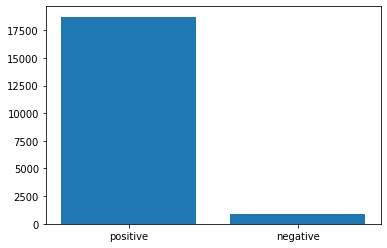

In [67]:
plt.bar(df.Sentiment.value_counts().index, df.Sentiment.value_counts())

In [68]:
print('Positive: {}%'.format(round((df.Sentiment.value_counts()['positive'] / df.shape[0]), 2)*100))
print('Negative: {}%'.format(round((df.Sentiment.value_counts()['negative'] / df.shape[0]), 2)*100))
#print('Neutral: {}%'.format(round((df.Sentiment.value_counts()['neutral'] / df.shape[0]), 2)*100))

Positive: 95.0%
Negative: 5.0%


In [69]:
data = [df]
sent = {'positive':1, 'negative':0}

for dataset in data:
    # convert sentiment into numbers
    dataset['Sentiment'] = dataset['Sentiment'].map(sent)
    dataset['Sentiment'] = dataset['Sentiment'].astype(int)
    

In [70]:
data = [df]
subj = {'very subjective':1, 'less subjective':0}

for dataset in data:
    # convert subjectivity into numbers
    dataset['Subj'] = dataset['Subj'].map(subj)
    dataset['Subj'] = dataset['Subj'].astype(int)
    

In [71]:
df.head()

,Rating,Review_Text,Recommended IND,Polarity,Subjectivity,Sentiment,Subj
0,4,absolutely wonderful silky sexy comfortable,1,0.633333,0.933333,1,1
1,5,love dress sooo pretty happen find store glad ...,1,0.318750,0.725000,1,0
3,5,love love love jumpsuit fun flirty fabulous ev...,1,0.500000,0.625000,1,0
4,5,shirt flat due adjustable front tie perfect le...,1,0.337500,0.525000,1,0
5,2,love tracy reese dress one petite foot tall us...,0,0.088889,0.483333,1,0


# Modelling

In [72]:
df_all = pd.merge(df.drop(columns='Review_Text'),doc_tfidf, 
                  left_index=True, right_index=True )
df_all.head()

,Rating,Recommended IND,Polarity,Subjectivity,Sentiment,Subj,0,1,2,3,...,20605,20606,20607,20608,20609,20610,20611,20612,20613,20614
0,4,1,0.633333,0.933333,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0.318750,0.725000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0.500000,0.625000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0.337500,0.525000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0.088889,0.483333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
X = df_all.drop(['Recommended IND', 'Subjectivity', 'Polarity'], axis=1)
y = df_all['Recommended IND']

X.head()

,Rating,Sentiment,Subj,0,1,2,3,4,5,6,...,20605,20606,20607,20608,20609,20610,20611,20612,20613,20614
0,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
print(X.shape)
print(y.shape)

(7746, 20618)
(7746,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=111)
print(X_train.shape )
print(X_test.shape )
print(y_train.shape )
print(y_test.shape)

(5422, 20618)
(2324, 20618)
(5422,)
(2324,)


In [76]:
y_train.value_counts(normalize=True)

1    0.880118
0    0.119882
Name: Recommended IND, dtype: float64

In [77]:
y_test.value_counts(normalize=True)

1    0.880379
0    0.119621
Name: Recommended IND, dtype: float64

In [78]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
pca_transformer = PCA(n_components=2).fit(X_train_scaled)
X_train_scaled_pca = pca_transformer.transform(X_train_scaled)
X_test_scaled_pca = pca_transformer.transform(X_test_scaled)
X_train_scaled_pca[:1]

array([[-0.21415886,  0.00746444]])

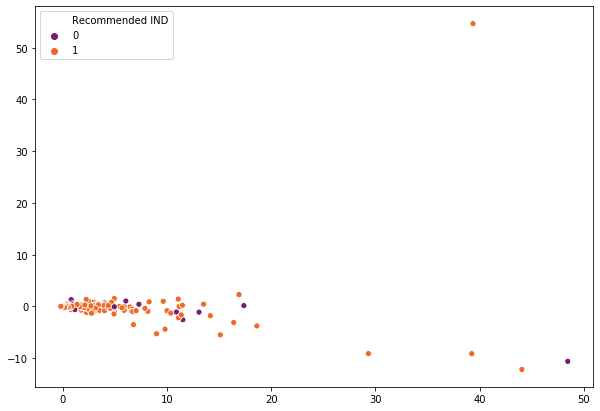

In [80]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train_scaled_pca[:, 0], 
                y=X_train_scaled_pca[:, 1], 
                hue=y_train, 
                sizes=100,
                palette="inferno") 

In [81]:
# create list of model and accuracy dicts
performs_list = []

# list to keep track of models
models_list = []

# list to keep track of proba scores
proba_score_list = []

In [82]:
# Defining a function to fit and predict ML algorithms
def model(model, model_name, x_train, y_train, x_test, y_test):

    # calculate accuracy of train
    acc = cross_val_score(model, X_train, y_train, cv = 5).mean()
    std = cross_val_score(model, X_train, y_train, cv = 5).std()
    
    # calculate accuracy of train
    print('Accuracy (TRAIN): {} +/- {}'.format(round(acc, 2), round(std, 2)))

    # fit model
    model.fit(x_train, y_train)
    
    # get predictions and probabilities
    pred = model.predict(x_test)
    proba = model.predict_proba(x_test)
    
    # calculate accuracy of test
    acc_test = round(accuracy_score(y_test, pred), 2)
    print(f'Accuracy (TEST): {acc_test}')
    
    
    # get precision, recall, f1-score
    precision, recall, fscore, support = score(y_test, pred, average='macro')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F-score   : {fscore}')
    
    
    # add model and accuracy dict to list
    performs_list.append(dict([
        ('Model', model_name),
        ('Train Accuracy', round(acc, 2)),
        ('Test Accuracy', acc_test),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(fscore, 2))
         ]))

    # add model to list
    models_list.append('{model}')

    # add proba score to list
    proba_score_list.append(proba)

In [83]:
gnb = GaussianNB()
model(gnb, "Gaussian Naive Bayes", X_train, y_train, X_test, y_test)

Accuracy (TRAIN): 0.42 +/- 0.04
Accuracy (TEST): 0.37
Precision : 0.49760330933832625
Recall    : 0.4950016526368348
F-score   : 0.3371600501591887


In [84]:
rf = RandomForestClassifier(n_estimators=50)
model(rf, "Random Forest Classifier", X_train, y_train, X_test, y_test)

Accuracy (TRAIN): 0.95 +/- 0.0
Accuracy (TEST): 0.96
Precision : 0.8719148936170213
Recall    : 0.9517605856663642
F-score   : 0.9061032417530184


In [85]:
lr = LogisticRegression()
model(lr, "Logistic Regression", X_train, y_train, X_test, y_test)

Accuracy (TRAIN): 0.99 +/- 0.0
Accuracy (TEST): 0.99
Precision : 0.9669667154010713
Recall    : 0.9655143920054572
F-score   : 0.9662389973653106


In [86]:
#svc = SVC(kernel='linear')
#model(svc, "SVC", X_train, y_train, X_test, y_test)

In [87]:
abc = AdaBoostClassifier(n_estimators=30, random_state=7)
model(abc, "Ada Boost Classifier", X_train, y_train, X_test, y_test)

Accuracy (TRAIN): 0.98 +/- 0.0
Accuracy (TEST): 0.98
Precision : 0.960621279374275
Recall    : 0.966335436049987
F-score   : 0.963454011741683


In [88]:
model_performance = pd.DataFrame(data=performs_list)
model_performance = model_performance[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,Gaussian Naive Bayes,0.42,0.37,0.50,0.50,0.34
1,Random Forest Classifier,0.95,0.96,0.87,0.95,0.91
2,Logistic Regression,0.99,0.99,0.97,0.97,0.97
3,Ada Boost Classifier,0.98,0.98,0.96,0.97,0.96


In [89]:
def plot_roc_curves():
    plt.figure(figsize=(10,6))
    lw = 2
    
    # Gaussian Naive Bayes
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,1], pos_label=1)
    auc = roc_auc_score(y_test, proba[:,1])
    plt.plot(fpr, tpr, color='y',
             lw=lw, label='Gaussian Naive Bayes, auc=%.3f' % gnb)
    
    # Random Forest
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,1], pos_label=1)
    auc = roc_auc_score(y_test, proba[:,1])
    plt.plot(fpr, tpr, color='y',
             lw=lw, label='Random Forest, auc=%.3f' % rf)
    
    
    # Logistic Regression
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,1], pos_label=1)
    auc_lr = roc_auc_score(y_test, proba[:,1])
    plt.plot(fpr, tpr, color='r',
             lw=lw, label='Logistic Regression, auc=%.3f' % lr)
         
    # Ada Boost
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,1], pos_label=1)
    auc_svc = roc_auc_score(y_test, proba[:,1])
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Ada Boost , auc=%.3f' % abc)

    
    # Formatting
    plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.title('Receiver Operating Characteristic', fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [90]:
#plot_roc_curves()

In [91]:
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, rf.predict(X_test)))

Random Forest confusion matrix: 

 [[ 263   15]
 [  87 1959]]


In [92]:
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, lr.predict(X_test)))

Logistic Regression confusion matrix: 

 [[ 261   17]
 [  16 2030]]


In [93]:
print("Ada Boost confusion matrix: \n\n", confusion_matrix(y_test, abc.predict(X_test)))

Ada Boost confusion matrix: 

 [[ 262   16]
 [  20 2026]]


In [94]:
# https://universaldependencies.org/u/dep/index.html
doc = nlp("I love this jumpsuit. it's fun, flirty, and fabulous!")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

In [98]:
tokens = nltk.word_tokenize("I love this jumpsuit. it' sfun, flirty, and fabulous!")
print('Part of Speech (POS): \n', nltk.pos_tag(tokens))

Part of Speech (POS): 
 [('I', 'PRP'), ('love', 'VBP'), ('this', 'DT'), ('jumpsuit', 'NN'), ('.', '.'), ('it', 'PRP'), ("'", "''"), ('sfun', 'NN'), (',', ','), ('flirty', 'NN'), (',', ','), ('and', 'CC'), ('fabulous', 'JJ'), ('!', '.')]


In [99]:
print('Tokens:', tokens)

Tokens: ['I', 'love', 'this', 'jumpsuit', '.', 'it', "'", 'sfun', ',', 'flirty', ',', 'and', 'fabulous', '!']
